# **From Scratch**

In [ ]:
import math
import random
from collections import Counter
from random import seed

In [ ]:
from csv import reader
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [ ]:
def encode_data(dataset):
    #Encodes categorical variables in the dataset to numeric.
    cols = list(zip(*dataset))
    data_encode = []
    for col in cols[:]:
        if all(item.replace('.','',1).isdigit() for item in col):
            data_encode.append([float(item) for item in col])
        else:
            unque_vals = list(set(col))
            col_encode = [unque_vals.index(item) for item in col]
            data_encode.append(col_encode)
    return list(zip(*data_encode))

In [ ]:
def euclidean_distance(x1, x2):
    #Calculate the Euclidean distance between two points.
    dist = 0.0
    for i in range(len(x1) - 1):
      dist += (float(x1[i]) - float(x2[i]))**2
    return math.sqrt(dist)

def manhattan_distance(x1, x2):

    #Calculate the Manhattan distance between two points.
    dist = 0.0
    for i in range(len(x1) - 1):
      dist += abs(float(x1[i]) - float(x2[i]))
    return dist

def hamming_distance(x1, x2):
    #Calculate the Hamming distance between two points.
    dist = 0
    for i in range(len(x1) - 1):
      if x1[i] != x2[i]:
        dist += 1
    return dist

def cosine_similarity(x1, x2):
    #Calculate the cosine similarity between two points.
    dot_product = 0.0
    norm_x1 = 0.0
    norm_x2 = 0.0
    for i in range(len(x1) - 1):
      dot_product += float(x1[i]) * float(x2[i])
      norm_x1 += float(x1[i]) ** 2
      norm_x2 += float(x2[i]) ** 2
    if norm_x1 == 0 or norm_x2 == 0:
        return 0.0
    else:
        return dot_product / (math.sqrt(norm_x1) * math.sqrt(norm_x2))

In [ ]:
def k_nearest_neighbors(data, query, k, distance_fn):
    #Find the k nearest neighbors of query point in the dataset using the specified distance function.
    neighbor_distances = []
    for index, example in enumerate(data):
        distance = distance_fn(example[:-1], query)
        neighbor_distances.append((distance, index))

    nearest_neighbors = sorted(neighbor_distances)
    k_nearestdistances = nearest_neighbors[:k]
    return k_nearestdistances

In [ ]:
def predict_classification(data, query, k, distance_fn):

    #Predict the class of the query point based on k nearest neighbors.
    knear_neighbors_indices = k_nearest_neighbors(data, query, k, distance_fn)

    knear_labels = [data[i][-1] for distance, i in knear_neighbors_indices]

    most_common = Counter(knear_labels).most_common(1)
    return most_common[0][0]

In [ ]:
def k_fold_cross_validation_split(data, k_folds):

    #Split dataset into k folds for cross-validation.
    data_split = []
    copyof_data = list(data)
    fold_size = int(len(data) / k_folds)
    for _ in range(k_folds):
        fold = []
        while len(fold) < fold_size:
            index = random.randrange(len(copyof_data))
            fold.append(copyof_data.pop(index))
        data_split.append(fold)
    return data_split

In [ ]:
def cross_validation_score(data, k_neighbors, k_folds, distance_fn):

    #Evaluate algorithm using a cross-validation split.
    folds = k_fold_cross_validation_split(data, k_folds)
    scores = []
    for fold in folds:
        training_set = list(folds)
        training_set.remove(fold)
        training_set = sum(training_set, [])
        testing_set = []
        for row in fold:
            row_copy = list(row)
            testing_set.append(row_copy)
            row_copy[-1] = None
        predicted = [predict_classification(training_set, row, k_neighbors, distance_fn) for row in testing_set]
        actual = [row[-1] for row in fold]
        accuracy = sum(1 for i in range(len(actual)) if actual[i] == predicted[i]) / float(len(actual))
        scores.append(accuracy)
    return scores

**Hayes-Roth Dataset**

Maximum accuracy:- 0.4384615384615385 at K = 7


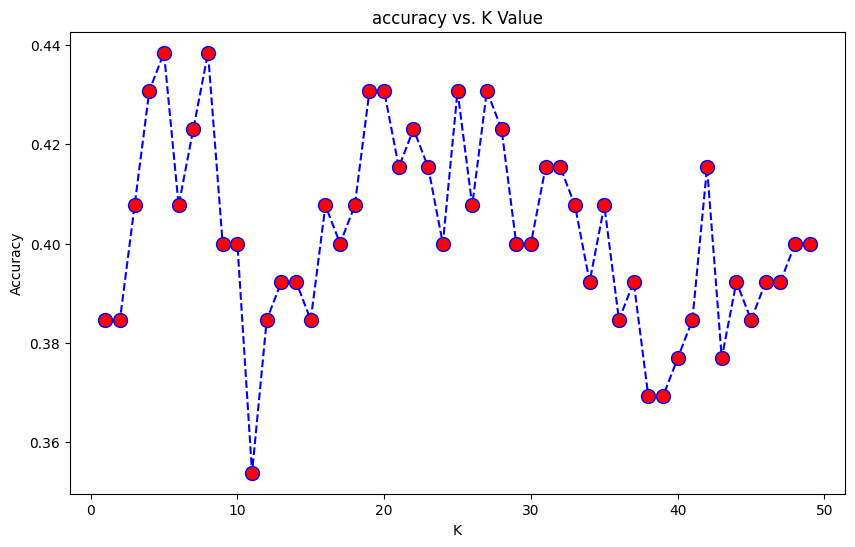

In [ ]:
# to find k value that gives maximum accuracy
import matplotlib.pyplot as plt
acc = []
filename = 'hayes-roth.data'
dataset = load_csv(filename)
X = [row[:-1] for row in dataset]
y= [row[-1] for row in dataset]
for i in range(1,50):
    seed(50)
    hrscores1 = cross_validation_score(dataset, i , 10, euclidean_distance)
    acc.append(sum(hrscores1)/len(hrscores1))
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
#To get accuracies for hayes-roth data
if __name__ == "__main__":
    filename = 'hayes-roth.data'
    dataset = load_csv(filename)
    seed(100)
    hrscores1 = cross_validation_score(dataset, 7, 10, euclidean_distance)
    print("Euclidean Distance")
    print("Scores :", hrscores1)
    print("Mean Accuracy:", sum(hrscores1)/len(hrscores1))
    hrscores2 = cross_validation_score(dataset, 7, 10, manhattan_distance)
    print("Manhattan Distance")
    print("Scores :", hrscores2)
    print("Mean Accuracy:", sum(hrscores2)/len(hrscores2))
    hrscores3 = cross_validation_score(dataset, 7, 10, hamming_distance)
    print("Hamming Distance")
    print("Scores :", hrscores3)
    print("Mean Accuracy:", sum(hrscores3)/len(hrscores3))
    hrscores4 = cross_validation_score(dataset, 7, 10, cosine_similarity)
    print("Cosine Similarity")
    print("Scores :", hrscores4)
    print("Mean Accuracy:", sum(hrscores4)/len(hrscores4))

Euclidean Distance
Scores : [0.46153846153846156, 0.3076923076923077, 0.46153846153846156, 0.46153846153846156, 0.6153846153846154, 0.5384615384615384, 0.23076923076923078, 0.5384615384615384, 0.38461538461538464, 0.38461538461538464]
Mean Accuracy: 0.4384615384615385
Manhattan Distance
Scores : [0.5384615384615384, 0.15384615384615385, 0.3076923076923077, 0.6153846153846154, 0.5384615384615384, 0.5384615384615384, 0.6153846153846154, 0.3076923076923077, 0.38461538461538464, 0.3076923076923077]
Mean Accuracy: 0.43076923076923074
Hamming Distance
Scores : [0.3076923076923077, 0.5384615384615384, 0.6923076923076923, 0.5384615384615384, 0.38461538461538464, 0.6153846153846154, 0.3076923076923077, 0.46153846153846156, 0.46153846153846156, 0.23076923076923078]
Mean Accuracy: 0.45384615384615384
Cosine Similarity
Scores : [0.23076923076923078, 0.23076923076923078, 0.15384615384615385, 0.15384615384615385, 0.23076923076923078, 0.3076923076923077, 0.23076923076923078, 0.23076923076923078, 0.0,

**Car Dataset**

In [ ]:
#To get accuracies for car data
if __name__ == "__main__":
    filename = 'car.data'
    dataset = load_csv(filename)
    dataset = encode_data(dataset)
    seed(100)
    cscores1 = cross_validation_score(dataset, 45, 10, euclidean_distance)
    print("Euclidean Distance")
    print("Scores :", cscores1)
    print("Mean Accuracy:", sum(cscores1)/len(cscores1))
    cscores2 = cross_validation_score(dataset, 45, 10, manhattan_distance)
    print("Manhattan Distance")
    print("Scores :", cscores2)
    print("Mean Accuracy:", sum(cscores2)/len(cscores2))
    cscores3 = cross_validation_score(dataset, 45, 10, hamming_distance)
    print("Hamming Distance")
    print("Scores :", cscores3)
    print("Mean Accuracy:", sum(cscores3)/len(cscores3))
    cscores4 = cross_validation_score(dataset, 45, 10, cosine_similarity)
    print("Cosine Similarity")
    print("Scores :", cscores4)
    print("Mean Accuracy:", sum(cscores4)/len(cscores4))

Euclidean Distance
Scores : [0.6976744186046512, 0.7441860465116279, 0.6104651162790697, 0.6569767441860465, 0.686046511627907, 0.7209302325581395, 0.7267441860465116, 0.7034883720930233, 0.75, 0.6627906976744186]
Mean Accuracy: 0.6959302325581395
Manhattan Distance
Scores : [0.6395348837209303, 0.7034883720930233, 0.6337209302325582, 0.6744186046511628, 0.7034883720930233, 0.6976744186046512, 0.6802325581395349, 0.7151162790697675, 0.7616279069767442, 0.6976744186046512]
Mean Accuracy: 0.6906976744186047
Hamming Distance
Scores : [0.6569767441860465, 0.6802325581395349, 0.6918604651162791, 0.6802325581395349, 0.7093023255813954, 0.7034883720930233, 0.6976744186046512, 0.6511627906976745, 0.7383720930232558, 0.7209302325581395]
Mean Accuracy: 0.6930232558139535
Cosine Similarity
Scores : [0.6744186046511628, 0.7093023255813954, 0.7151162790697675, 0.7034883720930233, 0.6918604651162791, 0.6744186046511628, 0.6337209302325582, 0.7383720930232558, 0.7790697674418605, 0.6686046511627907]


**Breast Cancer Dataset**

Maximum accuracy:- 0.775 at K = 8


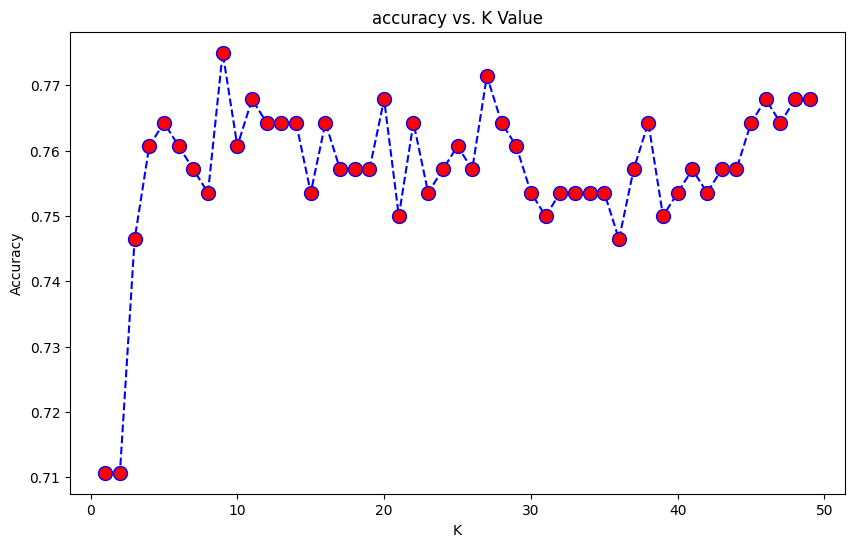

In [ ]:
# to find k value that gives maximum accuracy
import matplotlib.pyplot as plt
acc = []
filename = 'breast-cancer.data'
dataset = load_csv(filename)
dataset = encode_data(dataset)
X = [row[:-1] for row in dataset]
y= [row[-1] for row in dataset]

for i in range(1,50):
    seed(100)
    bcscores1 = cross_validation_score(dataset, i , 10, euclidean_distance)
    acc.append(sum(bcscores1)/len(bcscores1))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
#To get accuracies for breast cancer data
if __name__ == "__main__":
    filename = 'breast-cancer.data'
    dataset = load_csv(filename)
    dataset = encode_data(dataset)
    seed(100)
    bcscores1 = cross_validation_score(dataset, 8, 10, euclidean_distance)
    print("Euclidean Distance")
    print("Scores :", bcscores1)
    print("Mean Accuracy:", sum(bcscores1)/len(bcscores1))
    bcscores2 = cross_validation_score(dataset, 8, 10, manhattan_distance)
    print("Manhattan Distance")
    print("Scores :", bcscores2)
    print("Mean Accuracy:", sum(bcscores2)/len(bcscores2))
    bcscores3 = cross_validation_score(dataset, 8, 10, hamming_distance)
    print("Hamming Distance")
    print("Scores :", bcscores3)
    print("Mean Accuracy:", sum(bcscores3)/len(bcscores3))
    bcscores4 = cross_validation_score(dataset, 8, 10, cosine_similarity)
    print("Cosine Similarity")
    print("Scores :", bcscores4)
    print("Mean Accuracy:", sum(bcscores4)/len(bcscores4))

Euclidean Distance
Scores : [0.75, 0.6428571428571429, 0.5714285714285714, 0.8214285714285714, 0.7857142857142857, 0.7857142857142857, 0.8928571428571429, 0.7857142857142857, 0.75, 0.75]
Mean Accuracy: 0.7535714285714286
Manhattan Distance
Scores : [0.7857142857142857, 0.8928571428571429, 0.9285714285714286, 0.8214285714285714, 0.6785714285714286, 0.6785714285714286, 0.8571428571428571, 0.75, 0.75, 0.6071428571428571]
Mean Accuracy: 0.775
Hamming Distance
Scores : [0.75, 0.8214285714285714, 0.6785714285714286, 0.6785714285714286, 0.7857142857142857, 0.8571428571428571, 0.75, 0.8571428571428571, 0.8214285714285714, 0.7142857142857143]
Mean Accuracy: 0.7714285714285714
Cosine Similarity
Scores : [0.7857142857142857, 0.6785714285714286, 0.6785714285714286, 0.6428571428571429, 0.75, 0.75, 0.8214285714285714, 0.6428571428571429, 0.75, 0.5714285714285714]
Mean Accuracy: 0.7071428571428572


# **Sci-Kit Learn Implementation  && Paired T-Test**

In [ ]:
import random
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

**Hayes-Roth Dataset**

In [ ]:
filename = 'hayes-roth.data'
hrdataset = load_csv(filename)
X = [row[:-1] for row in hrdataset]
y= [row[-1] for row in hrdataset]

def convert_to_numeric(data):
  converted_data = []
  for row in data:
    converted_row = []
    for element in row:
      try:
        converted_row.append(float(element))
      except ValueError:
        raise ValueError("Data contains non-numeric values.")
    converted_data.append(converted_row)

  return converted_data


In [ ]:
from scipy.stats import ttest_rel
kf = KFold(n_splits=10, shuffle=True, random_state=100)
metrics=['euclidean','manhattan','hamming','cosine']
for metric in metrics:
  print(f"Using metric: {metric}")
  #from scratch
  if (metric== 'euclidean'):
    scratch_acc= hrscores1
  elif(metric== 'manhattan'):
    scratch_acc= hrscores2
  elif(metric== 'hamming'):
    scratch_acc= hrscores3
  elif(metric== 'cosine'):
    scratch_acc= hrscores4
  # sci-kit
  knn = KNeighborsClassifier(n_neighbors=7, metric= metric )
  cv_scores = [0] * kf.get_n_splits()
  for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = [X[index] for index in train_index]
    X_test = [X[index] for index in test_index]
    y_train = [y[index] for index in train_index]
    y_test = [y[index] for index in test_index]
    X = convert_to_numeric(X)
    X_train = convert_to_numeric(X_train)
    X_test = convert_to_numeric(X_test)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cv_scores[i] = sum(y_pred == y_test) / len(y_test)
  mean_score = sum(cv_scores) / kf.get_n_splits()
  std_dev_score = 0
  for score in cv_scores:
    std_dev_score += (score - mean_score)**2
  std_dev_score = (std_dev_score / kf.get_n_splits()) ** 0.5
  print(f"Mean accuracy score for {metric} : {mean_score}")
  print(" ")

  #ttest
  t_statistic, p_value = ttest_rel(scratch_acc, cv_scores)
  alpha =0.05
  if p_value < alpha:
    print(f"The difference is statistically significant(p value: {p_value})")
  else:
    print(f"The difference is not statistically significant(p value: {p_value})")
  print(" ")

Using metric: euclidean
Mean accuracy score for euclidean : 0.40989010989010993
 
The difference is not statistically significant(p value: 0.6952714796970705)
 
Using metric: manhattan
Mean accuracy score for manhattan : 0.4406593406593407
 
The difference is not statistically significant(p value: 0.8269695094432188)
 
Using metric: hamming
Mean accuracy score for hamming : 0.5445054945054946
 
The difference is not statistically significant(p value: 0.34287462906524063)
 
Using metric: cosine
Mean accuracy score for cosine : 0.43901098901098906
 
The difference is statistically significant(p value: 0.00016319658796530944)
 


**Car Dataset**

In [ ]:
filename = 'car.data'
dataset = load_csv(filename)
dataset = encode_data(dataset)
X = [row[:-1] for row in dataset]
y= [row[-1] for row in dataset]

In [ ]:
from scipy.stats import ttest_rel

kf = KFold(n_splits=10, shuffle=True, random_state=100)
metrics=['euclidean','manhattan','hamming','cosine']
for metric in metrics:
  print(f"Using metric: {metric}")
  #from scratch
  if (metric== 'euclidean'):
    scratch_acc= cscores1
  elif(metric== 'manhattan'):
    scratch_acc= cscores2
  elif(metric== 'hamming'):
    scratch_acc= cscores3
  elif(metric== 'cosine'):
    scratch_acc= cscores4

  # sci-kit
  knn = KNeighborsClassifier(n_neighbors=45, metric= metric )
  cv_scores = [0] * kf.get_n_splits()

  for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = [X[index] for index in train_index]
    X_test = [X[index] for index in test_index]
    y_train = [y[index] for index in train_index]
    y_test = [y[index] for index in test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cv_scores[i] = sum(y_pred == y_test) / len(y_test)
  mean_score = sum(cv_scores) / kf.get_n_splits()
  std_dev_score = 0
  for score in cv_scores:
    std_dev_score += (score - mean_score)**2
  std_dev_score = (std_dev_score / kf.get_n_splits()) ** 0.5
  print(f"Mean accuracy score for {metric} : {mean_score}")
  print(" ")
  #ttest
  t_statistic, p_value = ttest_rel(scratch_acc, cv_scores)
  alpha =0.05
  if p_value < alpha:
    print(f"The difference is statistically significant(p value: {p_value})")
  else:
    print(f"The difference is not statistically significant(p value: {p_value})")
  print(" ")

Using metric: euclidean
Mean accuracy score for euclidean : 0.7575346148675898
 
The difference is statistically significant(p value: 0.0074502282100910085)
 
Using metric: manhattan
Mean accuracy score for manhattan : 0.7743110633149617
 
The difference is statistically significant(p value: 0.0008003641886486011)
 
Using metric: hamming
Mean accuracy score for hamming : 0.7772146793923914
 
The difference is statistically significant(p value: 0.00012091379743594672)
 
Using metric: cosine
Mean accuracy score for cosine : 0.7754570506788547
 
The difference is statistically significant(p value: 0.00039235181735005785)
 


**Breast-Cancer Dataset**

In [ ]:
filename = 'breast-cancer.data'
dataset = load_csv(filename)
dataset = encode_data(dataset)
X = [row[1:] for row in dataset]
y= [row[0] for row in dataset]

In [ ]:
from scipy.stats import ttest_rel

kf = KFold(n_splits=10, shuffle=True, random_state=100)
metrics=['euclidean','manhattan','hamming','cosine']
for metric in metrics:
  print(f"Using metric: {metric}")
  #from scratch
  if (metric== 'euclidean'):
    scratch_acc= bcscores1
  elif(metric== 'manhattan'):
    scratch_acc= bcscores2
  elif(metric== 'hamming'):
    scratch_acc= bcscores3
  elif(metric== 'cosine'):
    scratch_acc= bcscores4

  # sci-kit
  knn = KNeighborsClassifier(n_neighbors=7, metric= metric )
  cv_scores = [0] * kf.get_n_splits()

  for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = [X[index] for index in train_index]
    X_test = [X[index] for index in test_index]
    y_train = [y[index] for index in train_index]
    y_test = [y[index] for index in test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cv_scores[i] = sum(y_pred == y_test) / len(y_test)
  mean_score = sum(cv_scores) / kf.get_n_splits()
  std_dev_score = 0
  for score in cv_scores:
    std_dev_score += (score - mean_score)**2
  std_dev_score = (std_dev_score / kf.get_n_splits()) ** 0.5
  print(f"Mean accuracy score for {metric} : {mean_score}")
  print(" ")
  #ttest
  t_statistic, p_value = ttest_rel(scratch_acc, cv_scores)
  alpha =0.05
  if p_value < alpha:
    print(f"The difference is statistically significant(p value: {p_value})")
  else:
    print(f"The difference is not statistically significant(p value: {p_value})")
  print(" ")

Using metric: euclidean
Mean accuracy score for euclidean : 0.727463054187192
 
The difference is not statistically significant(p value: 0.5196975634898158)
 
Using metric: manhattan
Mean accuracy score for manhattan : 0.7169950738916256
 
The difference is not statistically significant(p value: 0.1963464835581348)
 
Using metric: hamming
Mean accuracy score for hamming : 0.7412561576354679
 
The difference is not statistically significant(p value: 0.4416290080948907)
 
Using metric: cosine
Mean accuracy score for cosine : 0.7126847290640395
 
The difference is not statistically significant(p value: 0.8911368467550729)
 
